In [33]:
import pandas as pd
import pystan
import seaborn as sns
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Choose the Wine-Quality Database

In [40]:
data  = pd.read_csv("D:\Downloads\winequality-red.csv",sep = ";")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Choose the 2 independent variables with the dependent variable "quality" and print the lenght of data

In [41]:
x = data["quality"].values
y = data["alcohol"].values
z = data["residual sugar"].values
print("Cantidad de data:")
print(len(data))

Cantidad de data:
1599


# We plot the data to see the distribution

<AxesSubplot:ylabel='Count'>

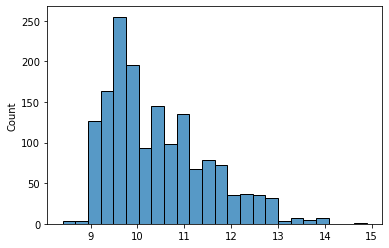

In [25]:
sns.histplot(y)

<AxesSubplot:ylabel='Count'>

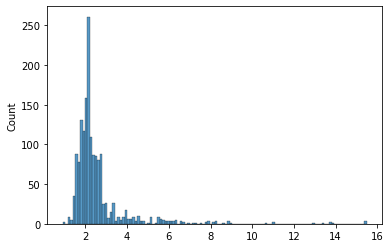

In [26]:
sns.histplot(z)

In [42]:
print("Min y:")
print(np.min(y))
print("Max y:")
print(np.max(y))
print("Promedio z:")
print(np.mean(z))
print("Desv. Est. z:")
print(np.std(z))


Min y:
8.4
Max y:
14.9
Promedio z:
2.53880550343965
Desv. Est. z:
1.4094871124880495


# Write the model

In [43]:
model = """
data {
  int<lower=0> N;
  vector[N] x;
  vector[N] y;
  vector[N] z;
}
parameters {
  real alpha;
  real beta;
  real gamma;
  real<lower=0> sigma;
}
model {
  // priors
  //alpha ~ normal(0, 10); 
  //beta ~ uniform(8, 15);
  //gamma ~ normal(3, 1); 
  //sigma ~ normal(0, 2.5); 

  // model
  x ~ normal(alpha + y * beta + z * gamma, sigma);
}
"""

# Run the model and print the summary

In [44]:
# Data
data = {'N': len(data) , 'x': x , 'y': y , 'z':z} 

# Compile
sm = pystan.StanModel(model_code=model)

# Samples
fit = sm.sampling(data=data, iter=1000, chains=4, warmup=500, thin=1, seed=101)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_fbc9dd32cabae42dfe445bd4d2b859e3 NOW.


In [7]:
print(fit.stansummary())

Inference for Stan model: anon_model_693d4f141cbb395cb4fd2d75278c7745.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

         mean se_mean     sd   2.5%    25%     50%    75%  97.5%  n_eff   Rhat
alpha    1.89  5.8e-3   0.17   1.56   1.77    1.89   2.01   2.21    891    1.0
beta     0.36  5.5e-4   0.02   0.33   0.35    0.36   0.37   0.39    882    1.0
gamma -3.2e-3  3.9e-4   0.01  -0.03  -0.01 -2.9e-3 5.9e-3   0.02   1141    1.0
sigma    0.71  3.4e-4   0.01   0.69    0.7    0.71   0.72   0.74   1394    1.0
lp__   -253.7    0.05   1.39 -257.1 -254.4  -253.4 -252.7 -252.0    679    1.0

Samples were drawn using NUTS at Wed May 25 17:21:17 2022.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


# Finally we run Arviz and see if the model fits correctly

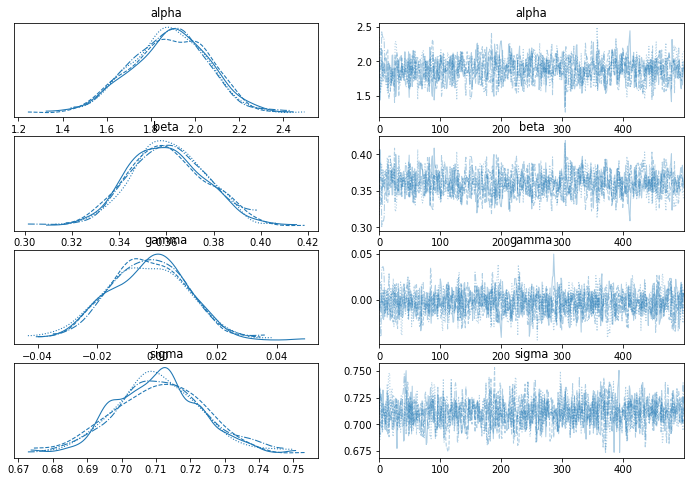

In [8]:
ax = az.plot_trace(fit, var_names=["alpha","beta","gamma","sigma"])